In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#For Arial font
#!conda install -c conda-forge -y mscorefonts
##-> The below was also needed in matplotlib 3.4.2
#import shutil
#import matplotlib
#shutil.rmtree(matplotlib.get_cachedir())
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import time

from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats import multitest as multi
from matplotlib.pyplot import sca
import pingouin as pg
from matplotlib import rcParams
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/msttcorefonts/times.ttf')
rc = {        
          "mathtext.fontset": 'stix',  # 保持使用STIX字体集来渲染数学字体，这与Times New Roman非常接近
    'font.family': 'serif',  # 设置字体族为serif，以便使用Times New Roman
    'font.serif': ['Times New Roman'],  # 指定Times New Roman作为serif字体
    'axes.unicode_minus': False  # 正常显示负号      
      } #设置字体样式 字体负号显示


In [2]:
M0 = [0.71,0.52,0.45,0.49,0.64,0.56,0.12]
M1 = [0.45,0.3,-0.04,0.03627472714393116,-0.016051425335782563,0.010321828776193451,0 ]
M2 = [0.52,0.28,0.03,-0.15941623845276248,0.04281085443826849,-0.03448790843986606,0]
M3 = [0.39,0.3,-0.03,0.052432203247021116,-0.03785042719401783,0.007225409628411591,0]
M4 = [0.45,0.36,0.36,0.1275877751219077,0.529190364628828,0.3168197019037257,0]
M5 = [0.29,0.34,0.01,0.2619814142888569,0.3587384610745399,0.30235649650627877,0]
RPN = [-0.10899961152213428,0.06643509488570291,0.3448132548489821,-0.1826220000839122,0.09003560476861061,-0.06880960238685876,-0.03]

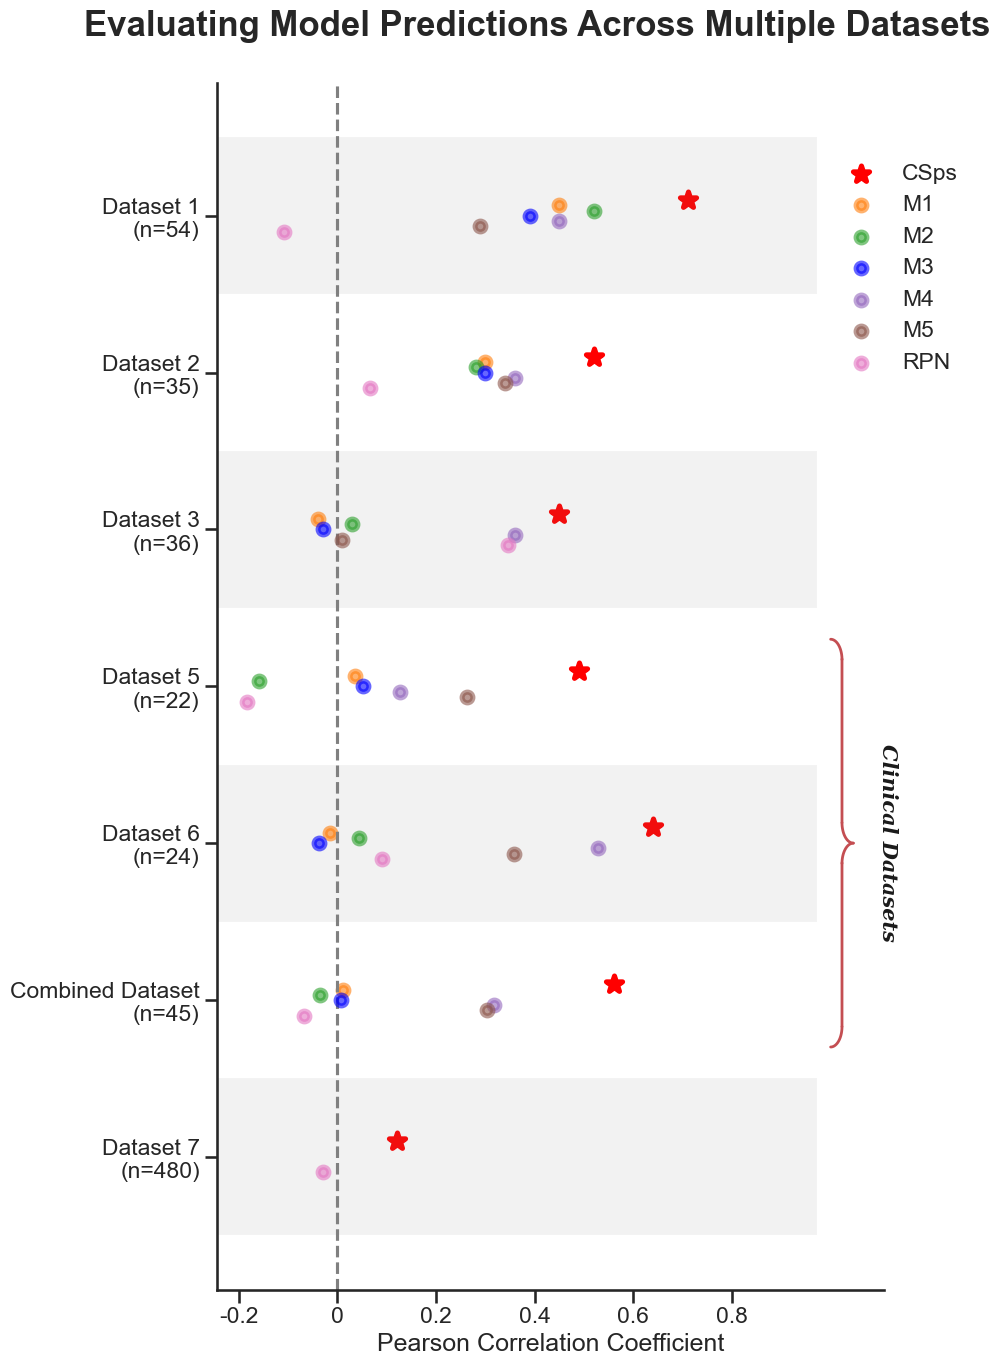

In [4]:
from matplotlib.transforms import blended_transform_factory
import sys
sys.path.append('/home/lxm/lxm/scripts_all/utils/matplotlib-curly-brace')
from curlyBrace import curlyBrace

# 添加大括号在 figure 范围
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 数据
datasets = ['Dataset 1\n(n=54)', 'Dataset 2\n(n=35)', 'Dataset 3\n(n=36)', 
            'Dataset 5\n(n=22)', 'Dataset 6\n(n=24)', 'Combined Dataset\n(n=45)',
            'Dataset 7\n(n=480)']


# 整理数据为长格式
data = {
    'Dataset': datasets * 7,
    'Prediction': M0 + M1 + M2 + M3 + M4 + M5 + RPN,
    'Model': ['CSps']*7 + ['M1']*7 + ['M2']*7 + ['M3']*7 + ['M4']*7 + ['M5']*7 + ['RPN']*7
}
df = pd.DataFrame(data)

# 过滤掉预测值为 0 的数据点
df = df[df['Prediction'] != 0]

# 绘图
sns.set(style='ticks', context='talk')
fig = plt.figure(figsize=(10, 14))
ax = sns.pointplot(
    data=df, 
    x='Prediction', 
    y='Dataset', 
    hue='Model', 
    dodge=0.2, 
    join=False, 
    palette='tab10',
    markers=['*' if model == 'CSps' else 'o' for model in df['Model'].unique()],
    scale=1.2
)

# 单独调整标记大小和透明度
for i, line in enumerate(ax.collections):
    model = df['Model'].unique()[i]
    if model == 'CSps':
        line.set_sizes([150])  # M0 markersize
        line.set_alpha(1)  # M0 不透明
    else:
        line.set_sizes([60])  # 其他模型 markersize
        line.set_alpha(0.6)  # 其他模型透明度

# 单独为 M0 和 M3 设置特定颜色
for i, line in enumerate(ax.collections):
    if df['Model'].unique()[i] == 'CSps':
        line.set_color('red')  # M0 使用红色星星
    elif df['Model'].unique()[i] == 'M3':
        line.set_color('blue')  # M3 使用蓝色

# 添加不同底色
for i in range(len(datasets)):
    if i % 2 == 0:
        ax.axhspan(i - 0.5, i + 0.5, xmax=0.9, facecolor='gray', alpha=0.1)  # 灰色底色
    # else:
    #     ax.axhspan(i - 0.5, i + 0.5, facecolor='white', alpha=1)   # 白色底色
font = {'family': 'serif',
        'color':  'k',
        'weight': 'bold',
        'style': 'italic',
        'size': 15,
        }

curlyBrace(fig, ax, [1, 5.3], [1, 2.7],
           0.05, bool_auto=True, str_text='Clinical Datasets', color='r', lw=2, int_line_num=3, fontdict=font,
)
# 添加参考线和图例
ax.set_xticks([-0.2,0, 0.2, 0.4,0.6, 0.8,])  # 选择三个刻度的位置
ax.set_xticklabels(['-0.2', '0','0.2','0.4','0.6', '0.8'])  # 设置对应刻度标签

plt.axvline(x=0, linestyle='--', color='gray')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('')
plt.title('Evaluating Model Predictions Across Multiple Datasets\n', fontsize=25, fontweight='bold', loc='left', x=-0.2)
plt.legend( bbox_to_anchor=(0.9, 0.95), loc='upper left', frameon=False)
sns.despine()
plt.tight_layout()
# save
fileDir = '/mnt/lxm/lxm/post_braincord/CSps_outputs_20241120/figs/'
fileName = 'figure7.tif'
plt.gcf().savefig(fileDir+fileName, dpi=300, bbox_inches='tight', pad_inches=0.04,
                  pil_kwargs={'compression':'tiff_lzw'})
plt.show()
